# H2O Automated Machine Learning (AutoML)

## 0 Introduction
The objective of this notbook is to anlayse the models generated by using H2O AutoML to determine parameters which improved the statistical evaluation metrics of the models. This way, the most important parameters can be emphasized to generate an optimal model.

### Agenda
- Analyse statistical evaluation metrics of AutoML models
- Illustrate which variables are determined as important by different models
- Illustrate residual plots of the models

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import os

In [12]:
from google.colab import drive 
drive.mount('/content/home')

Drive already mounted at /content/home; to attempt to forcibly remount, call drive.mount("/content/home", force_remount=True).


## 1 AutoML model analysis

In [13]:
# Install H2O
%%capture 
!pip install h2o

In [14]:
# Import the required packages for H2O AutoML operations 
import h2o
from h2o.automl import H2OAutoML

In [15]:
# Initiate H2O
h2o.init(ip="localhost", min_mem_size_GB=8)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 29 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_xfp647
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.977 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Use the ".model_performance()" method to get the model performance metrics obtainde against the validatation dataset. By default, this method returns the metrics based on the training data, hence we need to set the x validation argument for the model performance as "True" (xval=True) to get the metrics based on the validation data

In [74]:
# Specify the directory path where the models are stored
model_dir = "/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/06.1_Best_models/Second_round"

# Create an empty list to store the model file names
model_files = []

# Iterate through the directory and append the file names to the list
for file_name in os.listdir(model_dir):
    if file_name.endswith(".model"):
        model_files.append(file_name)

# Load each model in the directory, calculate their performance on cross-validation data, and store in a pandas DataFrame
df_models = pd.DataFrame(columns=['Model', 'MAE (CV)', 'MSE (CV)', 'RMSE (CV)', 'RMSLE (CV)', 'MRD (CV)'])
for file_name in model_files:
    model_path = os.path.join(model_dir, file_name)
    model = h2o.load_model(model_path)
    performance = model.model_performance(xval=True)
    metrics = [performance.mae(), performance.mse(), performance.rmse(), performance.rmsle(), performance.mean_residual_deviance()]
    df_models = pd.concat([df_models, pd.DataFrame({'Model': [file_name], 'MAE (CV)': [metrics[0]], 'MSE (CV)': [metrics[1]], 'RMSE (CV)': [metrics[2]], 'RMSLE (CV)': [metrics[3]], 'MRD (CV)': [metrics[4]]})], ignore_index=True)

In [75]:
df_models

,Model,MAE (CV),MSE (CV),RMSE (CV),RMSLE (CV),MRD (CV)
0,m30_filtered_DeepLearning_grid_1_AutoML_3_2023...,0.005656,0.001458,0.038188,0.028884,0.001458
1,m30_filtered_DeepLearning_grid_1_AutoML_1_2023...,0.005586,0.001463,0.038255,0.028882,0.001463
2,m30_filtered_DeepLearning_grid_1_AutoML_1_2023...,0.005074,0.001455,0.038149,0.028811,0.001455
3,m30_filtered_DeepLearning_grid_1_AutoML_1_2023...,0.005011,0.001453,0.038116,0.028791,0.001453
4,m30_filtered_DRF_1_AutoML_1_20230311_195720.model,0.005684,0.001818,0.042639,0.032945,0.001818
5,m68_filtered_DeepLearning_grid_1_AutoML_1_2023...,0.004606,0.001396,0.037363,0.028235,0.001396
6,m30_filtered_DeepLearning_grid_1_AutoML_1_2023...,0.005291,0.001460,0.038212,0.028891,0.001460
7,m68_filtered_DeepLearning_grid_1_AutoML_1_2023...,0.005689,0.001383,0.037182,0.028090,0.001383
8,m22_filtered_DeepLearning_grid_1_AutoML_1_2023...,0.003791,0.001491,0.038607,0.027579,0.001491
9,m68_filtered_DeepLearning_grid_1_AutoML_1_2023...,0.004697,0.001381,0.037158,0.028041,0.001381


Lets use "MAE" as a main evaluation metric as it is more robust agains outliers. Hence, we sort the models according to descending MAE score to determine models with the lowest MAE score

In [97]:
# Sort the DataFrame by 'MAE' column in descending order
df_models_sorted = df_models.sort_values(by=['MAE (CV)'], ascending=False)

# Reset the indexing of the DataFrame
df_models_sorted = df_models_sorted.reset_index(drop=True)

In [98]:
df_models_sorted

,Model,MAE (CV),MSE (CV),RMSE (CV),RMSLE (CV),MRD (CV)
0,m68_filtered_DeepLearning_grid_1_AutoML_1_2023...,0.005689,0.001383,0.037182,0.028090,0.001383
1,m30_filtered_DRF_1_AutoML_1_20230311_195720.model,0.005684,0.001818,0.042639,0.032945,0.001818
2,m30_filtered_DeepLearning_grid_1_AutoML_3_2023...,0.005656,0.001458,0.038188,0.028884,0.001458
3,m30_filtered_DeepLearning_grid_1_AutoML_1_2023...,0.005586,0.001463,0.038255,0.028882,0.001463
4,m68_filtered_GBM_grid_1_AutoML_1_20230311_1604...,0.005576,0.001397,0.037372,0.028285,0.001397
5,m30_filtered_DeepLearning_grid_1_AutoML_1_2023...,0.005291,0.001460,0.038212,0.028891,0.001460
6,m30_filtered_DeepLearning_grid_1_AutoML_1_2023...,0.005074,0.001455,0.038149,0.028811,0.001455
7,m68_filtered_DeepLearning_grid_1_AutoML_1_2023...,0.005045,0.001382,0.037169,0.028052,0.001382
8,m30_filtered_DeepLearning_grid_1_AutoML_1_2023...,0.005011,0.001453,0.038116,0.028791,0.001453
9,m22_filtered_DRF_1_AutoML_1_20230311_131621.model,0.004811,0.001963,0.044306,0.033065,0.001963


In [99]:
# Define function to highlight the lowest value in each column
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

In [100]:
# Highlight the lowest value in each column
df_models_sorted.style.apply(lambda x: highlight_min(x), subset=['MAE (CV)', 'MSE (CV)', 'RMSE (CV)', 'RMSLE (CV)', 'MRD (CV)'])


,Model,MAE (CV),MSE (CV),RMSE (CV),RMSLE (CV),MRD (CV)
0,m68_filtered_DeepLearning_grid_1_AutoML_1_20230312_155742_model_1.model,0.005689,0.001383,0.037182,0.028090,0.001383
1,m30_filtered_DRF_1_AutoML_1_20230311_195720.model,0.005684,0.001818,0.042639,0.032945,0.001818
2,m30_filtered_DeepLearning_grid_1_AutoML_3_20230311_131652_model_5.model,0.005656,0.001458,0.038188,0.028884,0.001458
3,m30_filtered_DeepLearning_grid_1_AutoML_1_20230311_144822_model_13.model,0.005586,0.001463,0.038255,0.028882,0.001463
4,m68_filtered_GBM_grid_1_AutoML_1_20230311_160422_model_68.model,0.005576,0.001397,0.037372,0.028285,0.001397
5,m30_filtered_DeepLearning_grid_1_AutoML_1_20230312_63950_model_5.model,0.005291,0.001460,0.038212,0.028891,0.001460
6,m30_filtered_DeepLearning_grid_1_AutoML_1_20230311_171500_model_2.model,0.005074,0.001455,0.038149,0.028811,0.001455
7,m68_filtered_DeepLearning_grid_1_AutoML_1_20230312_144401_model_13.model,0.005045,0.001382,0.037169,0.028052,0.001382
8,m30_filtered_DeepLearning_grid_1_AutoML_1_20230311_182403_model_5.model,0.005011,0.001453,0.038116,0.028791,0.001453
9,m22_filtered_DRF_1_AutoML_1_20230311_131621.model,0.004811,0.001963,0.044306,0.033065,0.001963


Lets use the MAE sorted dataframe "df_models_sorted" to print the statistics of the models by using the index order

In [101]:
# Create an empty list and load the models according to the sorted index order
models = []
for i in df_models_sorted.index:
    file_name = df_models_sorted.loc[i, 'Model']
    model_path = os.path.join(model_dir, file_name)
    model = h2o.load_model(model_path)
    models.append(model)
    print(file_name)

m68_filtered_DeepLearning_grid_1_AutoML_1_20230312_155742_model_1.model
m30_filtered_DRF_1_AutoML_1_20230311_195720.model
m30_filtered_DeepLearning_grid_1_AutoML_3_20230311_131652_model_5.model
m30_filtered_DeepLearning_grid_1_AutoML_1_20230311_144822_model_13.model
m68_filtered_GBM_grid_1_AutoML_1_20230311_160422_model_68.model
m30_filtered_DeepLearning_grid_1_AutoML_1_20230312_63950_model_5.model
m30_filtered_DeepLearning_grid_1_AutoML_1_20230311_171500_model_2.model
m68_filtered_DeepLearning_grid_1_AutoML_1_20230312_144401_model_13.model
m30_filtered_DeepLearning_grid_1_AutoML_1_20230311_182403_model_5.model
m22_filtered_DRF_1_AutoML_1_20230311_131621.model
m68_filtered_DeepLearning_grid_1_AutoML_1_20230312_155741_model_13.model
m68_filtered_DeepLearning_grid_1_AutoML_1_20230311_160424_model_13.model
m68_filtered_DeepLearning_grid_1_AutoML_1_20230312_144400_model_24.model
m23_filtered_DeepLearning_grid_1_AutoML_1_20230314_81650_model_12.model
m23_filtered_DeepLearning_grid_1_AutoML_

In [102]:
models[20]

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20230311_144817_model_11


Status of Neuron Layers: predicting abundance, regression, gaussian distribution, Quadratic loss, 8,221 weights/biases, 102.7 KB, 1,944,469 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate               rate_rms              momentum    mean_weight          weight_rms           mean_bias           bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ----------------------  --------------------  ----------  -------------------  -------------------  ------------------  -----------------------
    1        409      Input             15.0
    2        20       RectifierDropout  20.0       0.0   0.0   0.09918717924397921     0.2797011137008667    0.0         0.03443018373556212  0.22757196426391602  44.857533100229794  29.255279541015625
    3        1        Linear                       0.0   0.0   0.00014158465954281497  0.000462939846329391  0.0         0.7187022570520639   0.5571763515472412   -722.6552712581973  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.37484975870693116
RMSE: 0.6122497519043443
MAE: 0.5895017487967451
RMSLE: NaN
Mean Residual Deviance: 0.37484975870693116

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.0014905315706831063
RMSE: 0.03860740305541291
MAE: 0.00379052849264137
RMSLE: 0.027579477458618717
Mean Residual Deviance: 0.0014905315706831063

Cross-Validation Metrics Summary: 
                        mean         sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  -----------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.00377509   0.00456979  0.0157986     0.00661872    0.00365306    0.00122296    0.00293195    0.00285752    0.00120292    0.00116464    0.00119796    0.0011025
mean_residual_deviance  0.00148057   0.00404321  0.0129073     0.00155131    0.00018868    4.65767e-06   7.42372e-05   3.27378e-05   9.86865e-06   1.2847e-05    9.15351e-06   1.48465e-05
mse                     0.00148057   0.00404321  0.0129073     0.00155131    0.00018868    4.65767e-06   7.42372e-05   3.27378e-05   9.86865e-06   1.2847e-05    9.15351e-06   1.48465e-05
r2                      -0.00890514  0.154369    0.0309248     -0.00820842   0.0373416     -0.0450057    -0.0336647    0.389821      -0.111084     -0.135426     -0.15269      -0.0610597
residual_deviance       0.00148057   0.00404321  0.0129073     0.00155131    0.00018868    4.65767e-06   7.42372e-05   3.27378e-05   9.86865e-06   1.2847e-05    9.15351e-06   1.48465e-05
rmse                    0.0196833    0.034851    0.11361       0.0393866     0.0137361     0.00215816    0.0086161     0.00572169    0.00314144    0.00358428    0.00302548    0.00385312
rmsle                   0.015445     0.0239686   0.078008      0.0339246     0.0129943     0.00214292    0.0083464     0.00555289    0.0031189     0.00355223    0.00300352    0.00380628

Scoring History: 
    timestamp            duration           training_speed    epochs    iterations    samples      training_rmse    training_deviance    training_mae    training_r2
--  -------------------  -----------------  ----------------  --------  ------------  -----------  ---------------  -------------------  --------------  -------------
    2023-03-11 15:32:08  0.000 sec                            0         0             0            nan              nan                  nan             nan
    2023-03-11 15:32:08  43 min 45.817 sec  60644 obs/sec     9.73605   1             7156         0.0387917        0.0015048            0.00388409      0.0285783
    2023-03-11 15:

In [105]:
save = False

In [104]:
if save:
  # Define a function to extract the file name without the extension
  def get_file_name(model_path):
    file_name = os.path.basename(model_path)
    return os.path.splitext(file_name)[0]
    
    # Loop over the varimp lists and save each as a separate CSV file
    dl_model_nums = [0, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    dl_varimps = []
    for num in dl_model_nums:
      dl_varimps.append(models[num].varimp())
      for i, varimp in enumerate(dl_varimps):
        # Create a list of dictionaries with the required information
        rows = []
        for row in varimp:
          position, amino_acid, relative_importance, scaled_importance, percentage = (
              int(row[0].split('.')[0]), row[0].split('.')[1], row[1], row[2], row[3]
              )
          if amino_acid != 'missing(NA)':
            rows.append({
                'Position': position,
                'Amino acid': amino_acid,
                'Relative importance': relative_importance,
                'Scaled importance': scaled_importance,
                'Percentage': percentage
            })
            
            # Write the list of dictionaries to a CSV file  
            output_file_name = get_file_name(df_models_sorted.loc[dl_model_nums[i], 'Model']) + '_varimp.csv'
            output_path = os.path.join('/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/06.4_Var_importance/Second_round/', output_file_name)
            with open(output_path, 'w', newline='') as f:
              fieldnames = ['Position', 'Amino acid', 'Relative importance', 'Scaled importance', 'Percentage']
              writer = csv.DictWriter(f, fieldnames=fieldnames)
              writer.writeheader()
              writer.writerows(rows)

In [106]:
if save:
  # Define a function to extract the file name without the extension
  def get_file_name(model_path):
    file_name = os.path.basename(model_path)
    return os.path.splitext(file_name)[0]
    
    # Loop over the varimp lists and save each as a separate CSV file
    non_dl_model_nums = [1, 4, 9]
    non_dl_varimps = []
    for num in non_dl_model_nums:
      non_dl_varimps.append(models[num].varimp())
      for i, varimp in enumerate(non_dl_varimps):
        # Create a list of dictionaries with the required information
        rows = []
        for row in varimp:
            position, relative_importance, scaled_importance, percentage = (
                row[0], row[1], row[2], row[3]
                )
            rows.append({
                'Position': position,
                'Relative importance': relative_importance,
                'Scaled importance': scaled_importance,
                'Percentage': percentage
                })
            # Write the list of dictionaries to a CSV file  
            output_file_name = get_file_name(df_models_sorted.loc[non_dl_model_nums[i], 'Model']) + '_varimp.csv'
            output_path = os.path.join('/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/06.4_Var_importance/Second_round/', output_file_name)
            with open(output_path, 'w', newline='') as f:
                fieldnames = ['Position', 'Relative importance', 'Scaled importance', 'Percentage']
                writer = csv.DictWriter(f, fieldnames=fieldnames)
                writer.writeheader()
                writer.writerows(rows)

In [107]:
# read the csv file with the varimp data
df_varimp = pd.read_csv('/content/home/MyDrive/DTU-MASTER/DTU-Sem4/Thesis/sigpep/Data/06_H2O_AutoML/06.4_Var_importance/Second_round/m22_filtered_DeepLearning_grid_1_AutoML_1_20230311_144817_model_11_varimp.csv')

# create a pivot table with rows as positions, columns as amino acids, and values as relative importance
df_pivot = df_varimp.pivot(index='Position', columns='Amino acid', values='Relative importance')

# fill NaN values with 0
df_pivot = df_pivot.fillna(0)

# Normalize the range of amino acids in the pivot dataset
df_pivot_norm = df_pivot.div(df_pivot.sum(axis=1), axis=0)

In [108]:
df_pivot_norm

Amino acid,-,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
Position,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.047086,0.000000,0.022775,0.000000,0.052626,0.041900,0.065744,0.065531,0.081607,...,0.053275,0.038446,0.087931,0.041551,0.070170,0.049166,0.041406,0.043519,0.059799,0.066434
2,0.000000,0.056808,0.030211,0.030184,0.029267,0.060903,0.069599,0.032107,0.052106,0.060818,...,0.029674,0.048020,0.076005,0.041655,0.052931,0.054448,0.042243,0.075904,0.041892,0.063411
3,0.000000,0.051068,0.019533,0.000000,0.021322,0.061537,0.050986,0.050597,0.052991,0.066372,...,0.028313,0.045949,0.062924,0.042537,0.050427,0.067904,0.083982,0.055674,0.040636,0.048718
4,0.000000,0.044293,0.033302,0.019454,0.036424,0.058743,0.046679,0.041867,0.061264,0.053568,...,0.070305,0.037241,0.063062,0.051508,0.053186,0.062682,0.054585,0.051601,0.044204,0.056742
5,0.000000,0.068274,0.038425,0.058548,0.000000,0.072245,0.057038,0.038668,0.047047,0.039803,...,0.028414,0.041792,0.062848,0.035436,0.046921,0.051420,0.050795,0.059189,0.080732,0.044281
6,0.000000,0.065822,0.042815,0.000000,0.027075,0.067745,0.046518,0.036518,0.057049,0.039873,...,0.043340,0.046361,0.056763,0.065649,0.034473,0.069647,0.056358,0.063685,0.050727,0.036074
7,0.000000,0.061740,0.050455,0.022208,0.024302,0.063938,0.035474,0.039811,0.075270,0.055744,...,0.029816,0.043031,0.051448,0.043394,0.043788,0.064316,0.072318,0.062660,0.033612,0.064036
8,0.000000,0.082975,0.044562,0.000000,0.000000,0.068236,0.062626,0.020961,0.066945,0.033651,...,0.094004,0.025954,0.056499,0.054704,0.055349,0.052730,0.062598,0.063988,0.058008,0.045449
9,0.000000,0.082224,0.050809,0.000000,0.000000,0.078201,0.041795,0.045798,0.099888,0.033042,...,0.035655,0.027582,0.054645,0.031641,0.024699,0.099247,0.073155,0.071259,0.033948,0.038006


In [109]:
!pip install logomaker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 47.2 MB/s eta 0:00:00


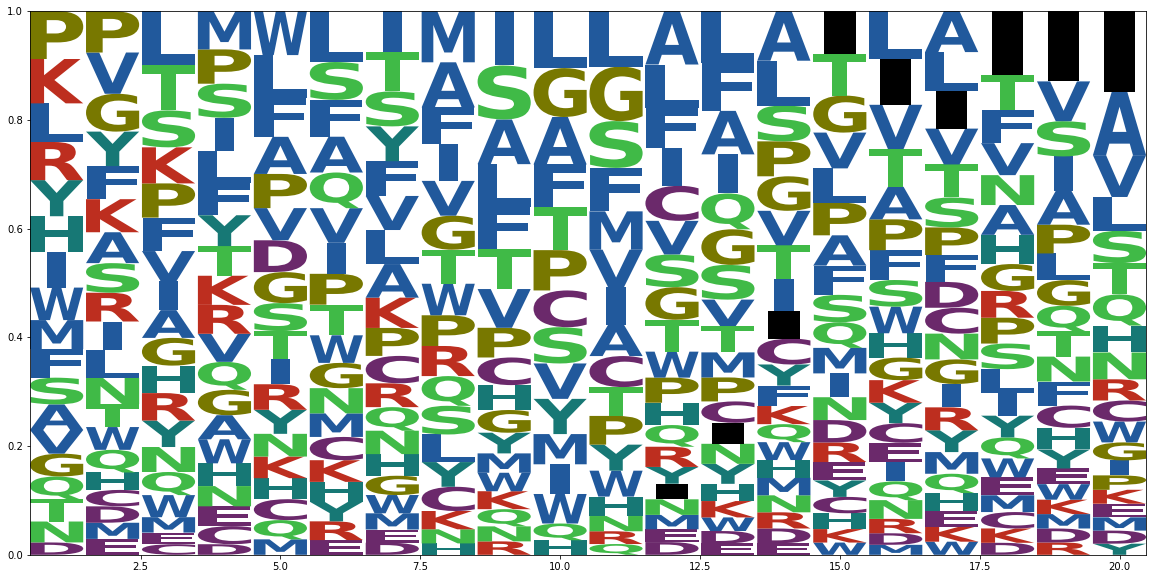

In [110]:
import logomaker as lm

logo = lm.Logo(df_pivot_norm, 
               font_name = 'Arial Rounded MT Bold',
               color_scheme='NajafabadiEtAl2017',
               figsize=(20,10))

## 5 Visualization of AutoML model

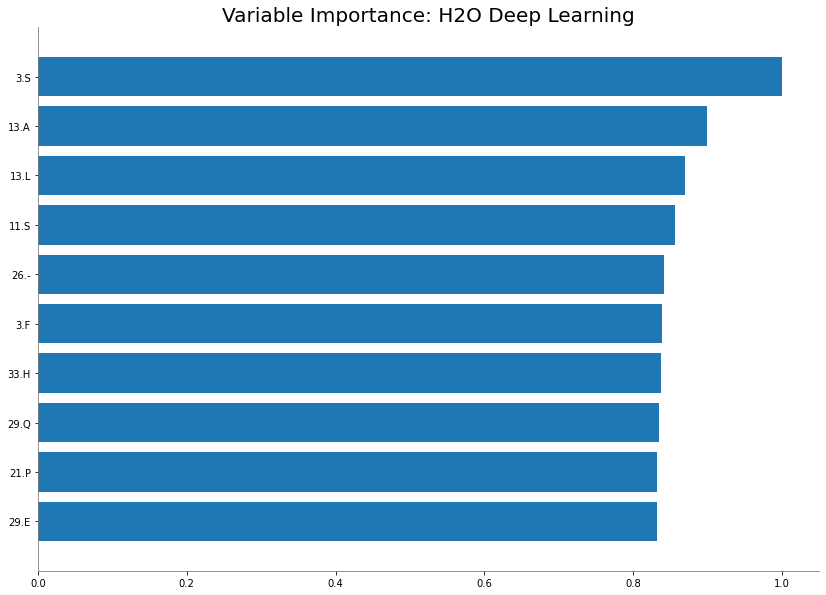

<Figure size 432x288 with 0 Axes>

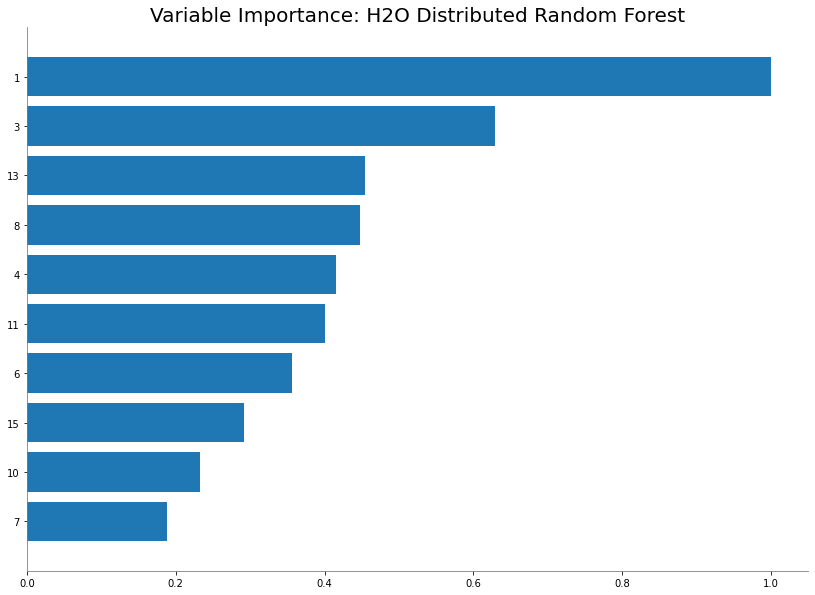

<Figure size 432x288 with 0 Axes>

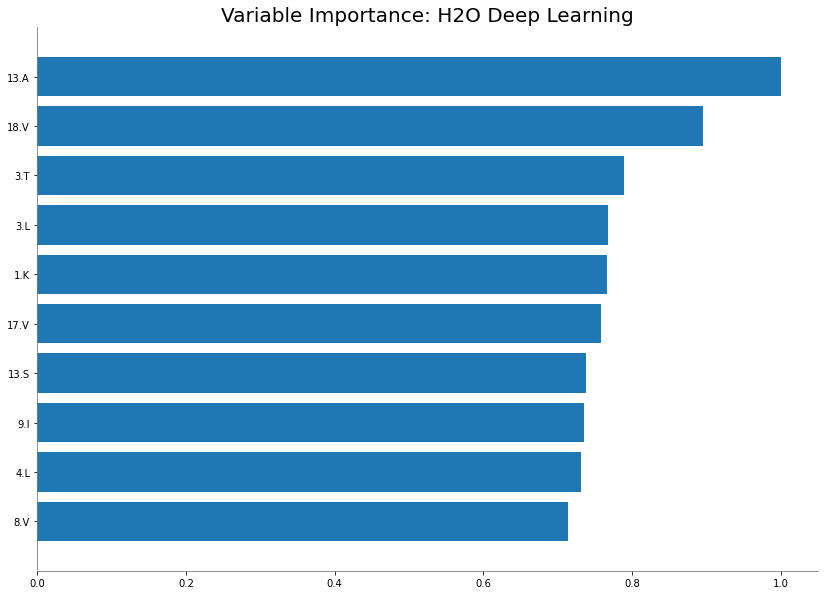

<Figure size 432x288 with 0 Axes>

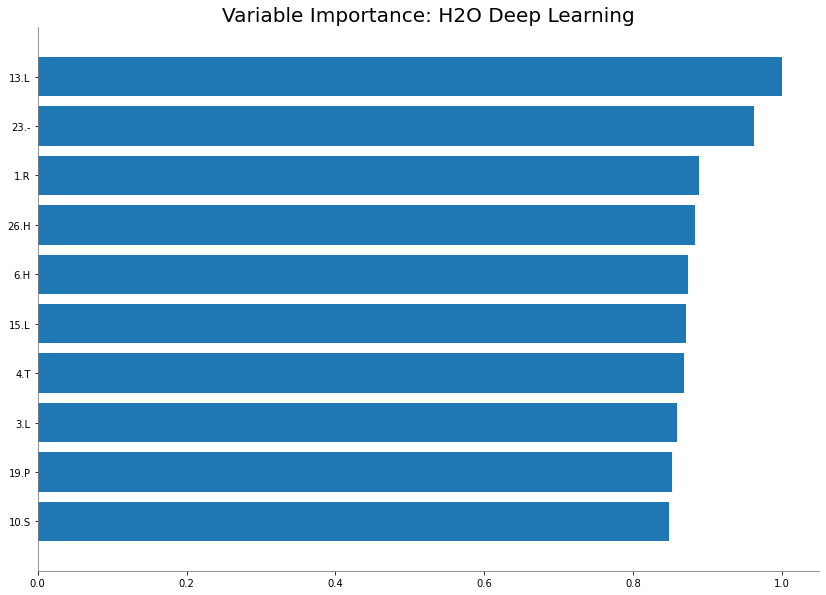

<Figure size 432x288 with 0 Axes>

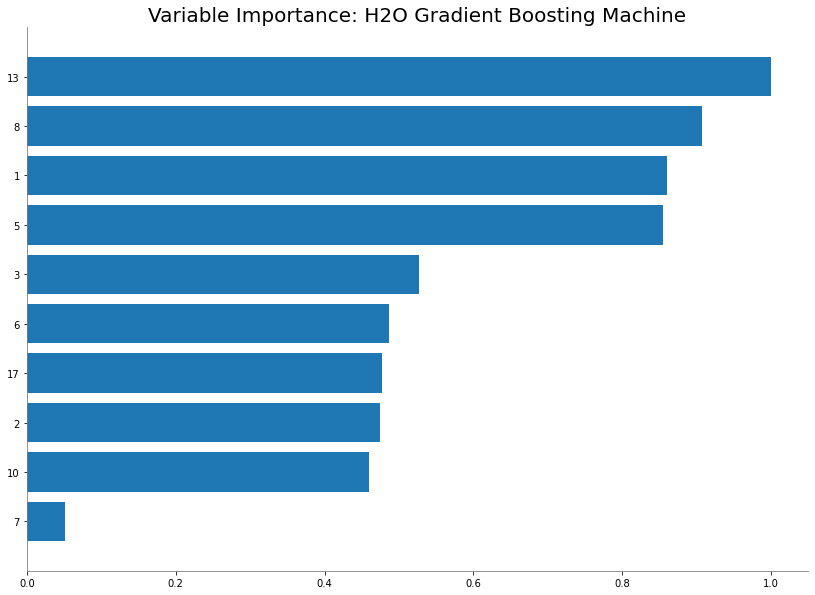

<Figure size 432x288 with 0 Axes>

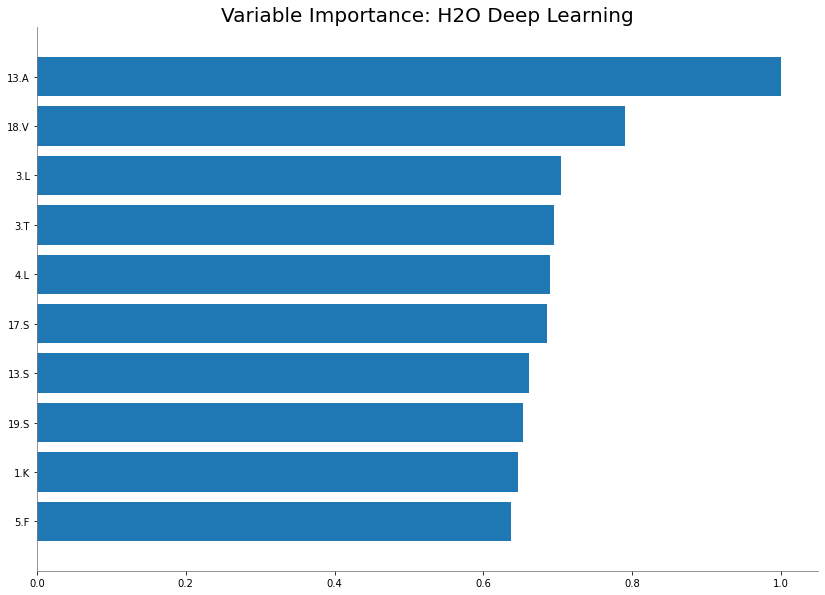

<Figure size 432x288 with 0 Axes>

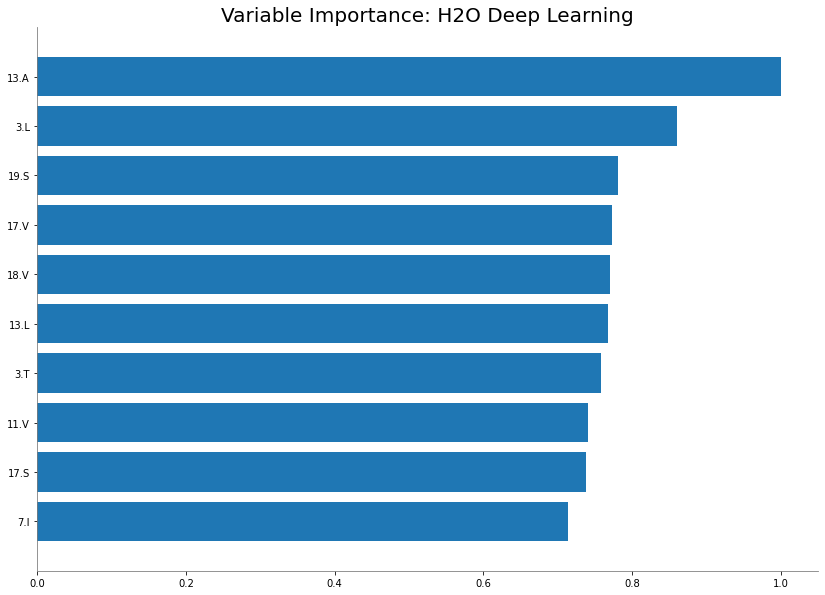

<Figure size 432x288 with 0 Axes>

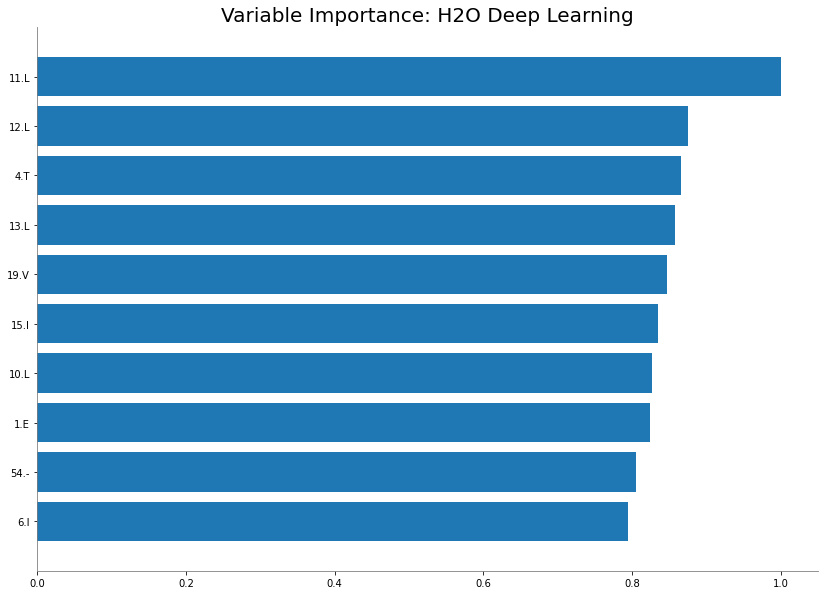

<Figure size 432x288 with 0 Axes>

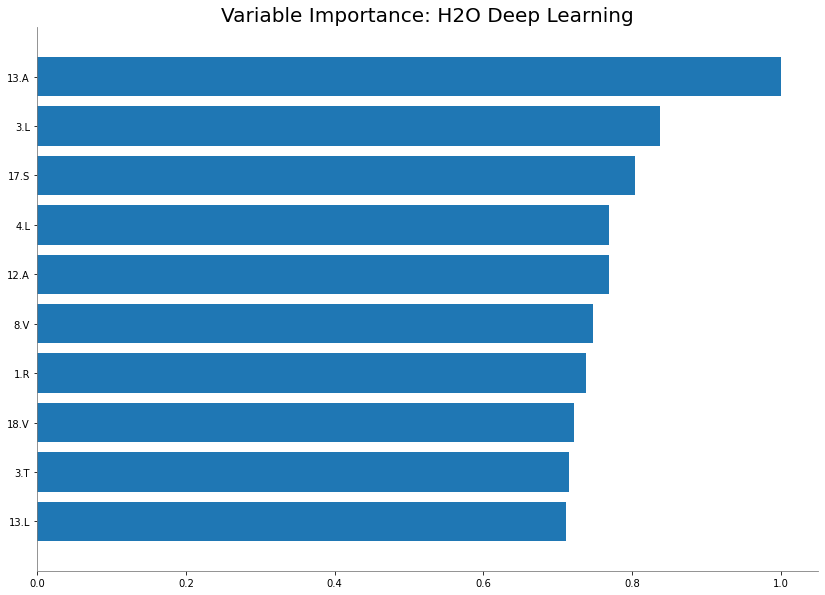

<Figure size 432x288 with 0 Axes>

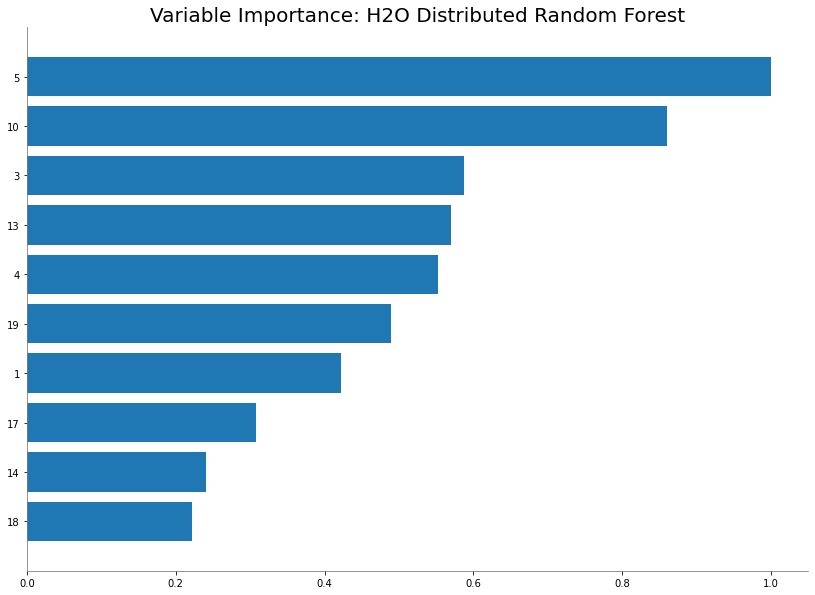

<Figure size 432x288 with 0 Axes>

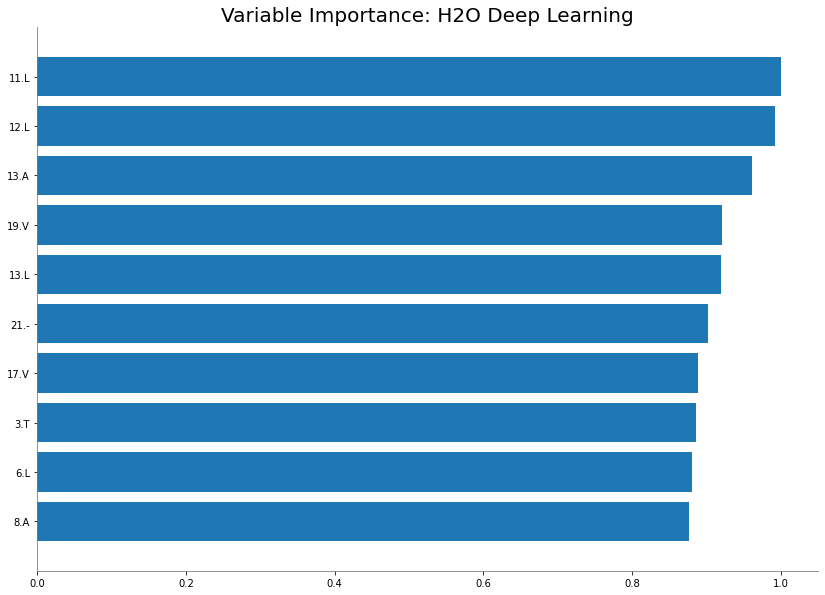

<Figure size 432x288 with 0 Axes>

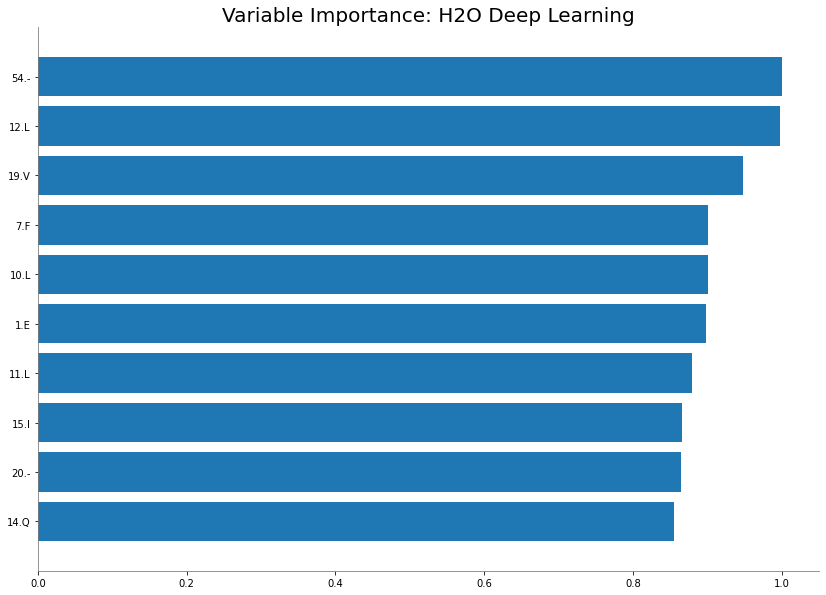

<Figure size 432x288 with 0 Axes>

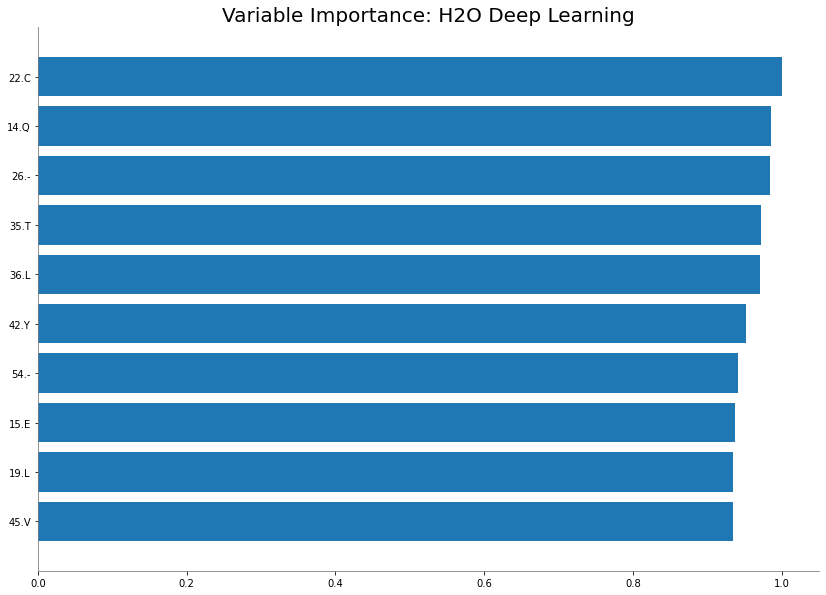

<Figure size 432x288 with 0 Axes>

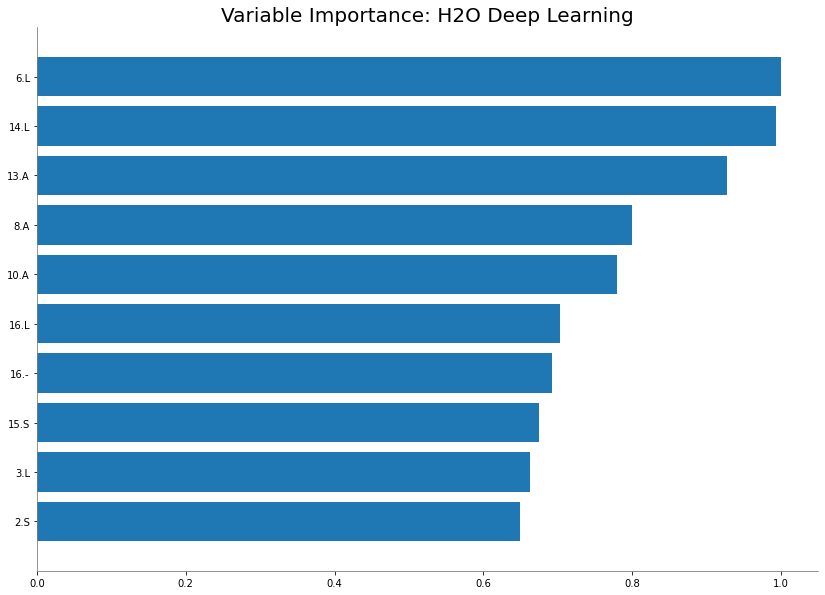

<Figure size 432x288 with 0 Axes>

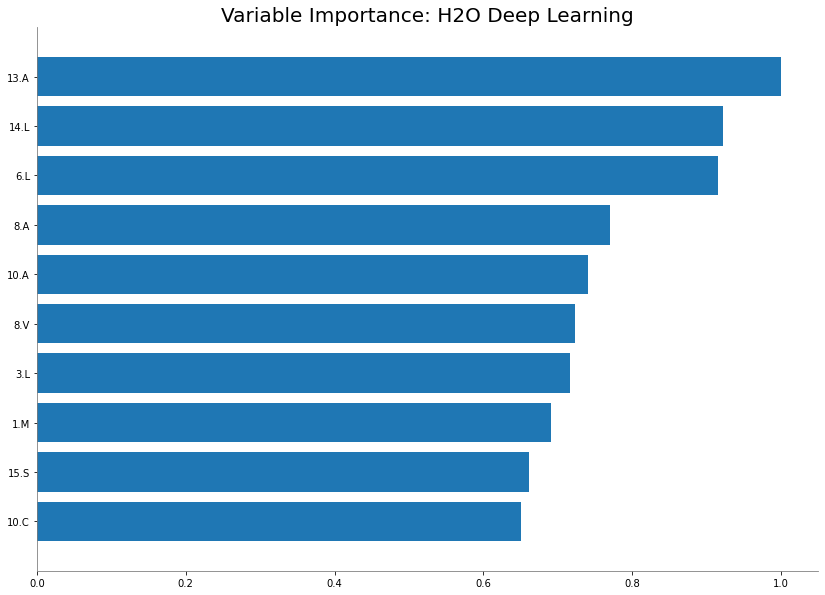

<Figure size 432x288 with 0 Axes>

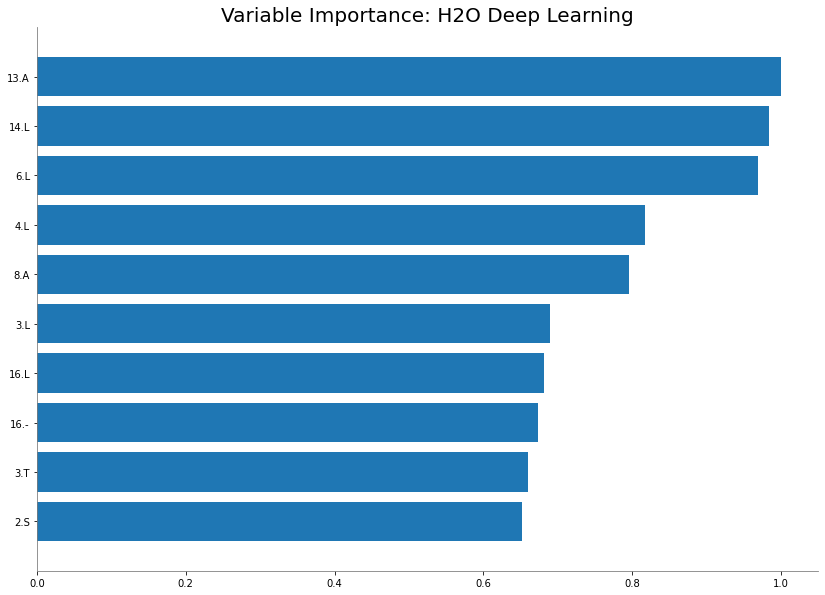

<Figure size 432x288 with 0 Axes>

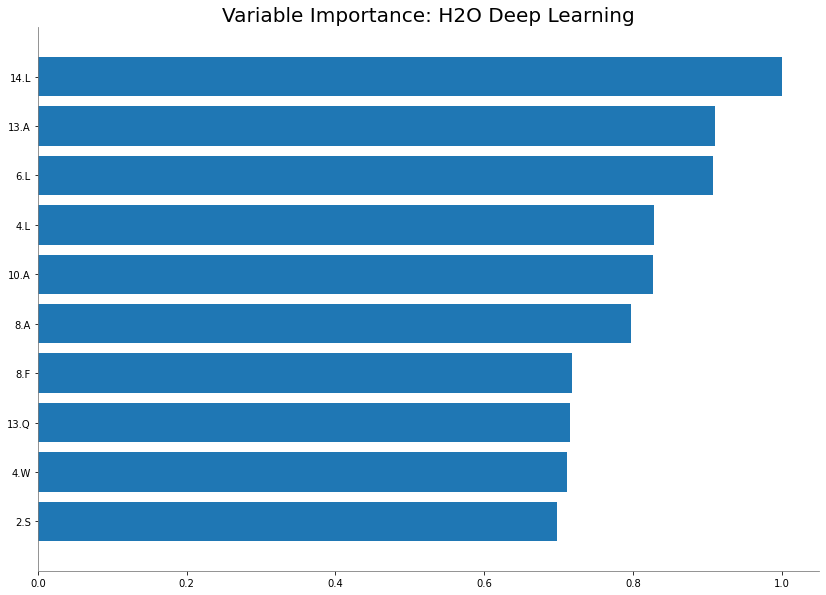

<Figure size 432x288 with 0 Axes>

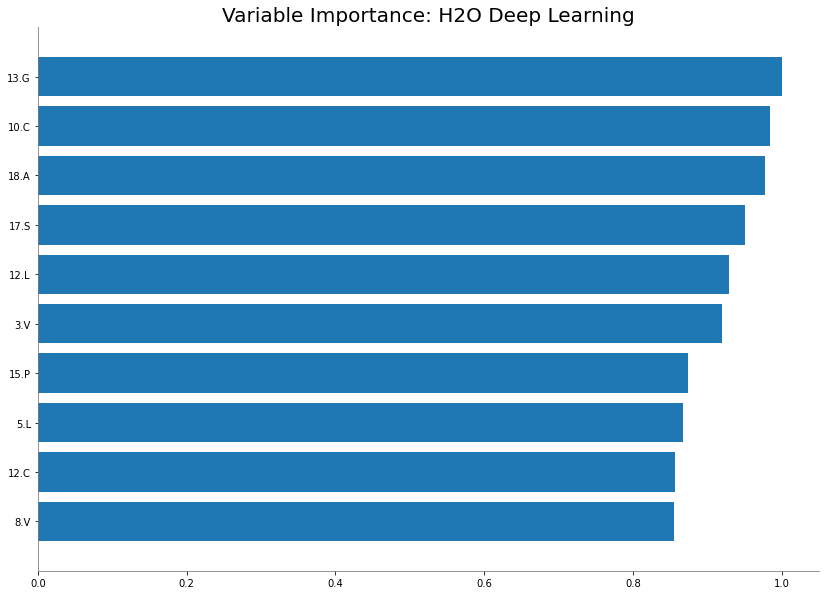

<Figure size 432x288 with 0 Axes>

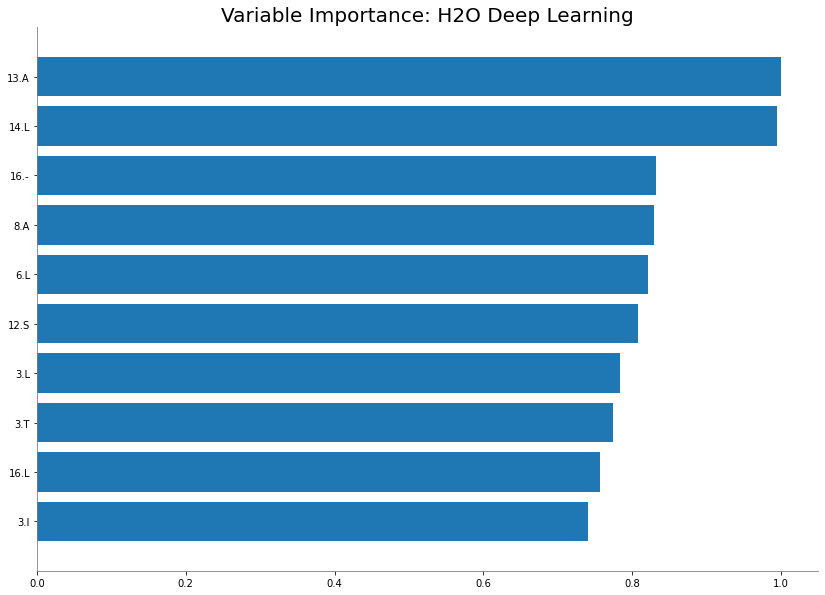

<Figure size 432x288 with 0 Axes>

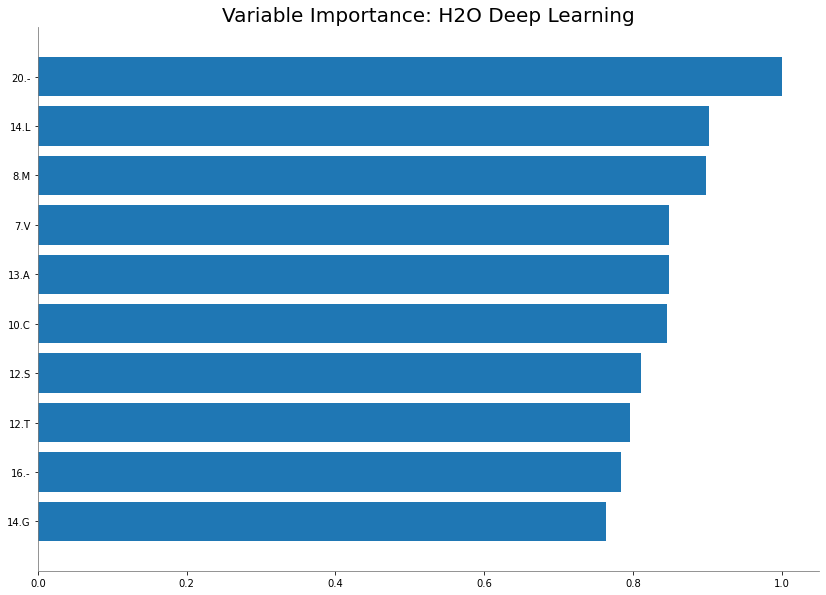

<Figure size 432x288 with 0 Axes>

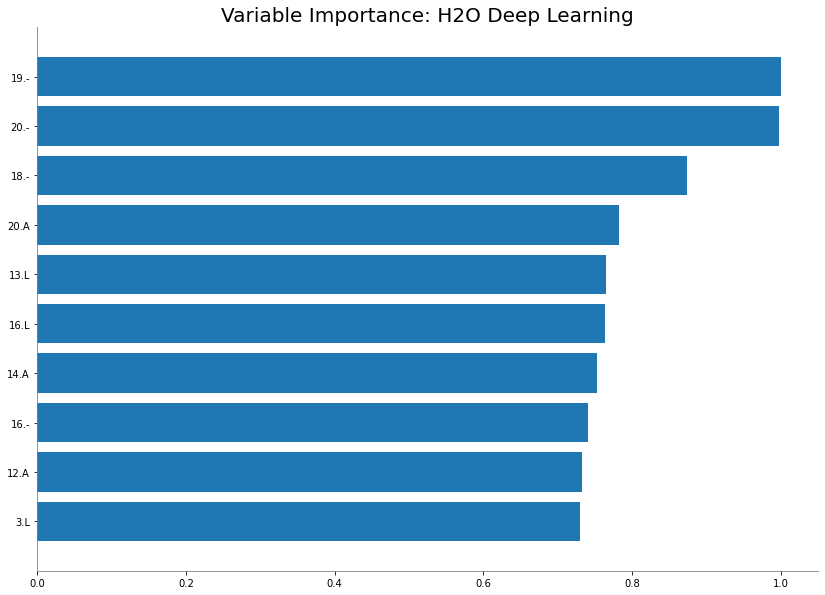

<Figure size 432x288 with 0 Axes>

In [111]:
# Generate variable importance plost for models
for i in range(len(models)):
    model = models[i]
    model.varimp_plot()